# Estatística - Teste de Hipóteses
Ludmylla Martins Caetano -- Squad Rita Levi-Montalcini

In [ ]:
#Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para estatística
import scipy.stats as stats

## Considerando a base de dados **experimento_test_ab.csv**

### 1. Qual dos cenários tem a maior taxa de conversão?
Sendo a taxa de conversão dada por:
$$Taxa_{conversão} = \frac{Conversões}{Visualizações}*100$$
Onde:
* Conversões: clientes que compraram;
* Visualizações: total de vezes que o produto foi visto.

In [ ]:
#Base de dados
df_test = pd.read_csv("experimento_teste_ab.csv")
df_test

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0
...,...,...,...,...
1995,1996,B,120,0
1996,1997,B,182,0
1997,1998,B,197,0
1998,1999,B,122,0


In [ ]:
df_test['Versão_Página'].unique()

array(['A', 'B'], dtype=object)

In [ ]:
# Separando os dados das versões
df_testA = df_test[(df_test['Versão_Página'] == 'A')]
df_testB = df_test[(df_test['Versão_Página'] == 'B')]

# Contando a quantidade de visualizações de cada versão
testA_visu = df_testA['Visualizações'].sum()
testB_visu = df_testB['Visualizações'].sum()

In [ ]:
# Contando o total de conversões
conversoesA = (df_testA['Conversões'] == 1).sum()
conversoesB = (df_testB['Conversões'] == 1).sum()

# Calculando a taxa de conversões
taxa_conversoesA = conversoesA/testA_visu
taxa_conversoesB = conversoesB/testB_visu

# Imprimindo a maior taxa
if (taxa_conversoesA > taxa_conversoesB):
  print(f'O Cenário A tem uma taxa de conversão maior, de {taxa_conversoesA * 100 :.2f}%.')
elif (taxa_conversoesA < taxa_conversoesB):
  print(f'O Cenário B tem uma taxa de conversão maior, de {taxa_conversoesB * 100 :.2f}%.')
else:
  print(f'Os cenários A e B possuem a mesma taxa de conversão, de {taxa_conversoesB * 100 :.2f}%.')

O Cenário B tem uma taxa de conversão maior, de 0.08%.


**Teste A/B**

In [ ]:
from scipy.stats import ttest_ind

# Realizando o teste t
t, p = ttest_ind(df_testA['Visualizações'], df_testB['Visualizações'])

# Imprimindo o resultado
print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

t = 0.123
p = 0.902


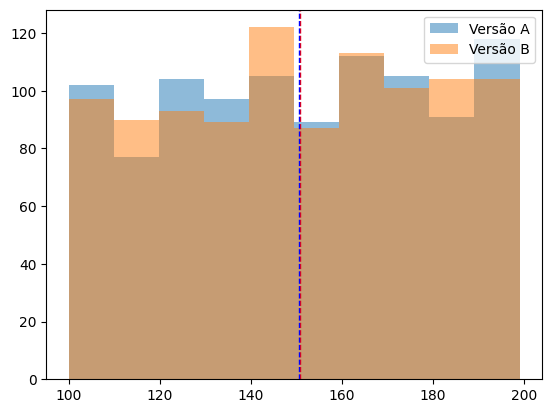

In [ ]:
# Calculando as médias
versao_A = df_testA['Visualizações']
versao_B = df_testB['Visualizações']
media_A = np.mean(versao_A)
media_B = np.mean(versao_B)

# Plotando os dados
plt.hist(versao_A, alpha=0.5, label='Versão A')
plt.hist(versao_B, alpha=0.5, label='Versão B')
plt.axvline(media_A, color='r', linestyle='dashed', linewidth=1)
plt.axvline(media_B, color='b', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.show()

### 2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

a. O cenário A, da base, como o inicial, que funciona hoje.

b. Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).

c. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.

d.  aumento para 10% de conversão.

In [ ]:
import math
# 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).
z = 1.96
alfa = 0.05

# 80% de certeza
b = 0.20
poder_teste = 1-b

desvio = df_testA['Visualizações'].std()
variancia = math.sqrt(desvio)

# delta
media_atual_cr = taxa_conversoesA * 100
acrescimo = 0.1
fator_multiplicacao = media_atual_cr*(1+acrescimo)
delta = (fator_multiplicacao - media_atual_cr)**2


Variância do grupo de controle (campanha A): 5.38064794249423


In [ ]:
n = (((z + poder_teste)**2) * variancia)/delta
print(f"Tamanho de amostra ideal: {n}")

Tamanho de amostra ideal: 845820.8726542314


##Considerando a base **pacientes.csv**, com dados fictícios.

Sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:




In [ ]:
# Base de dados
df_pacientes = pd.read_csv("pacientes.csv")
df_pacientes

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais
...,...,...,...,...,...,...,...,...,...
995,995,136.381404,58,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
996,996,161.801012,41,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
997,997,134.390624,70,0,0,0,Masculino,Caucasiano,Saudável
998,998,160.818609,33,1,0,0,Feminino,Caucasiano,Saudável


3. Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

In [ ]:
# Separando a amostra
indices = ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362])
amostra_45 = df_pacientes.loc[indices]
media = amostra_45['Idade'].mean()
desvio_padrao = amostra_45['Idade'].std()

# t test
mu = 51

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(amostra_45['Idade'], mu)
print("T statistic:", t_stat)
print("P-value:", p_value)

# Setting significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("A hipótese nula pode ser rejeitada; há uma diferença significativa entre a média da amostra e a da população.")
else:
    print("A hipoótese nula não pode ser rejeitada; não há diferença significativa entre a idade média maior que 50 e a idade média da amostra.")


T statistic: -0.5358800810733447
P-value: 0.5947401851581473
A hipoótese nula não pode ser rejeitada; não há diferença significativa entre a idade média maior que 50 e a idade média da amostra.


4. Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

In [ ]:
df_pacientes_saudavel = df_pacientes[(df_pacientes['Estado_Saude'] == 0)]
df_pacientes_adicional = df_pacientes[(df_pacientes['Estado_Saude'] == 1)]

# kstest
resultado = stats.kstest(rvs=df_pacientes_saudavel['Pressao_Arterial'], cdf=df_pacientes_adicional['Pressao_Arterial'])
pvalor = resultado[1]

alpha = 0.05

if pvalor <= alpha:
    print('Dependentes (rejeita H0)')
else:
    print('Independentes (não rejeita H0)')

Independentes (não rejeita H0)


5. Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe,  índices = ([690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [ ]:
# Separando a amostra
indices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372])
amostra_q5 = df_pacientes.loc[indices]

amostra_q5_saudavel = amostra_q5[(amostra_q5['Estado_Saude'] == 0)]
amostra_q5_adicional = amostra_q5[(amostra_q5['Estado_Saude'] == 1)]

alpha = 0.06
stats.kstest(rvs=amostra_q5_saudavel['Pressao_Arterial'], cdf=amostra_q5_adicional['Pressao_Arterial'])


KstestResult(statistic=0.17575757575757575, pvalue=0.9647229671660954, statistic_location=160.0893321243566, statistic_sign=1)

In [ ]:
# t test
from scipy.stats import ttest_ind
stat, p = ttest_ind(amostra_q5_saudavel['Pressao_Arterial'], amostra_q5_adicional['Pressao_Arterial'])
print(f'T-statistic: {stat}')
print(f'P-value: {p}')

T-statistic: -0.08124024162329026
P-value: 0.9359246016248415


6. Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)

  a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.

  b. Existe uma associação entre a idade dos pacientes e sua pressão arterial?

   * i. Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.

  * ii. Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.

  c. Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

In [ ]:
# a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.
df_pacientes['Nome_Etnia'].unique()

array(['Afro-americano', 'Asiático', 'Hispânico', 'Caucasiano'],
      dtype=object)

In [ ]:
# extraindo a idade de cada um dos grupos
afro_americano = df_pacientes[df_pacientes['Nome_Etnia'] == 'Afro-americano']['Pressao_Arterial']
asiatico = df_pacientes[df_pacientes['Nome_Etnia'] == 'Caucasiano']['Pressao_Arterial']
hispanico = df_pacientes[df_pacientes['Nome_Etnia'] == 'Caucasiano']['Pressao_Arterial']
caucasiano = df_pacientes[df_pacientes['Nome_Etnia'] == 'Caucasiano']['Pressao_Arterial']

# Perform the ANOVA
stats.f_oneway(afro_americano, asiatico, hispanico, caucasiano)

F_onewayResult(statistic=0.3703628726958419, pvalue=0.774413571436461)

Como o p-valor é maior que 0,05 a hipótese nula não pode ser rejeitada.

In [ ]:
# b. Existe uma associação entre a idade dos pacientes e sua pressão arterial?
df_pacientes['Idade'].unique()

array([31, 35, 39, 43, 55, 66, 52, 63, 57, 40, 34, 42, 61, 65, 67, 60, 33,
       38, 53, 68, 62, 44, 37, 49, 30, 41, 45, 50, 64, 32, 54, 70, 36, 56,
       58, 51, 69, 48, 59, 46, 47])

In [ ]:
# Calculando as idades para cada etnia
idade_por_grupo = df_pacientes.groupby('Nome_Etnia')['Idade'].agg(['max', 'min', 'mean', 'median', 'std'])

# Renomeando as colunas
idade_por_grupo.columns = ['Idade Máxima', 'Idade Mínima', 'Idade Média', 'Mediana', 'Desvio Padrão']
idade_por_grupo

,Idade Máxima,Idade Mínima,Idade Média,Mediana,Desvio Padrão
Nome_Etnia,,,,,
Afro-americano,70,30,48.330769,47.5,11.455058
Asiático,70,30,50.551587,50.0,11.673911
Caucasiano,70,30,50.450644,50.0,11.949550
Hispânico,70,30,49.792157,49.0,11.609795


In [ ]:
# Calculando os quartis para cada grupo étnico
quartis_idade_por_grupo = df_pacientes.groupby('Nome_Etnia')['Idade'].quantile([0.25, 0.5, 0.75]).unstack()

# Renomeando as colunas
quartis_idade_por_grupo.columns = ['Q1', 'Q2 (Mediana)', 'Q3']
quartis_idade_por_grupo

,Q1,Q2 (Mediana),Q3
Nome_Etnia,,,
Afro-americano,38.0,47.5,58.0
Asiático,41.0,50.0,61.0
Caucasiano,40.0,50.0,61.0
Hispânico,40.0,49.0,59.5


In [ ]:
from scipy.stats import spearmanr

# Iterar sobre cada grupo de produto
for grupo_id in df_pacientes['Nome_Etnia'].unique():
    # Filtrar os dados para o grupo atual
    grupo = df_pacientes[df_pacientes['Nome_Etnia'] == grupo_id]

    # Calcular o coeficiente de correlação de Spearman entre idade e durabilidade
    coeficiente_correlacao, p_valor = spearmanr(grupo['Idade'], grupo['Pressao_Arterial'])

    # Exibir o resultado do teste
    print(f"Etnia {grupo_id}: Coeficiente de Correlação de Spearman = {coeficiente_correlacao:.4f}, Valor-p = {p_valor:.4f}")

Etnia Afro-americano: Coeficiente de Correlação de Spearman = 0.0148, Valor-p = 0.8126
Etnia Asiático: Coeficiente de Correlação de Spearman = -0.1471, Valor-p = 0.0195
Etnia Hispânico: Coeficiente de Correlação de Spearman = 0.0369, Valor-p = 0.5576
Etnia Caucasiano: Coeficiente de Correlação de Spearman = -0.0460, Valor-p = 0.4843


* Para a etnia Asiático não há correlação entre a idade e a pressão arterial, já que o p-valor é menor que 0,05;
* Para as demais etnias há correlação significativa, já que o p-valor é maior que 0,05;
* Para a etnia Afro-americano e Hispânico há uma correlação positiva, a pressão arterial tende a aumentar com a idade dos voluntários;
* Para a etnia Caucasiano há uma correlação negativa, a pressão arterial tende a diminuir com a idade dos voluntários.

7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

* Quanto maior o valor de chi2, maior a evidência de associação entre as variáveis.
* O valor de p indica a probabilidade de obter um resultado igual ou mais extremo que o observado, se a hipótese nula fosse verdadeira.

In [ ]:
# Definir variáveis da base de dados
var1 = 'Nome_Genero'
var2 = 'Nome_Estado_Saude'

# Criar tabela de contingência
chi = pd.crosstab(df_pacientes[var1], df_pacientes[var2])
chi

Nome_Estado_Saude,Com condições de saúde adicionais,Saudável
Nome_Genero,,
Feminino,257,246
Masculino,253,244


In [ ]:
# Teste Qui-Quadrado
from scipy.stats import chi2_contingency

# Cálculo do Qui-Quadrado a partir da tabela de contingência
chi_scores = chi2_contingency(chi)

# chi2_contingency retorna uma tupla
scores = pd.Series(chi_scores[0]) # primeiro elemento possui o valor de qui-quadrado
pvalues = pd.Series(chi_scores[1]) # segundo elemento possui o p-valor
print(f"Qui-quadrado: {chi_scores[0]}\np-valor: {chi_scores[1]}")

Qui-quadrado: 0.0
p-valor: 1.0


8. Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

In [ ]:
df_pacientes_adicional = df_pacientes[(df_pacientes['Estado_Saude'] == 1)]
media = df_pacientes_adicional['Pressao_Arterial'].mean()
desvio_padrao = stats.tstd(df_pacientes_adicional['Pressao_Arterial'])
graus_liberdade = len(df_pacientes_adicional['Pressao_Arterial']) - 1

intervalo_confianca = stats.t.interval(0.95, graus_liberdade, loc=media, scale=desvio_padrao)
print(f'O intervalo de confiança é de: \nLimite inferior: {intervalo_confianca[0] : .2f}\nLimite superior: {intervalo_confianca[1] : .2f}')

O intervalo de confiança é de: 
Limite inferior:  129.82
Limite superior:  170.41


9. A distribuição da pressão arterial na população segue uma distribuição normal?

  a. Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.

  b. Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.

**Medidas de Tendência Central**

In [ ]:
# Variáveis Estatísticas
media = df_pacientes['Pressao_Arterial'].mean()
mediana = df_pacientes['Pressao_Arterial'].median()
moda = df_pacientes['Pressao_Arterial'].mode()[0]
print(f'Média: {media}\nModa: {moda}\nMediana: {mediana}')

Média: 150.37562261552253
Moda: 112.92982068924913
Mediana: 150.45562389214672


O valor da moda é diferente dos demais.

**QQ Plot**

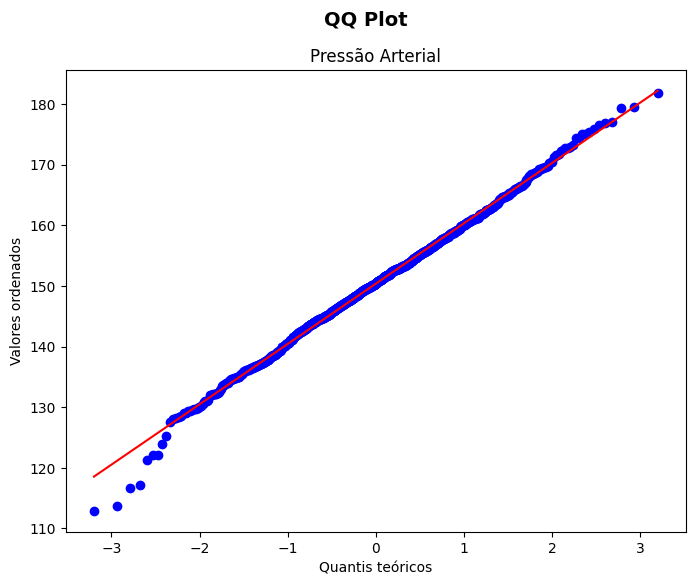

In [ ]:
# QQ Plot
plt.figure(figsize=(8,6))
stats.probplot(df_pacientes['Pressao_Arterial'], dist='norm', plot=plt)
plt.title('Pressão Arterial')
plt.xlabel('Quantis teóricos')
plt.ylabel('Valores ordenados')
plt.suptitle('QQ Plot', fontsize=14, fontweight='bold')
plt.show()

Os valores estão quase totalmente sobre a reta, com inclinação de 45°, caracterizando uma distribuição normal.

**Shapiro Wilk**

O teste retornará a estatística, que terá um valor de significância associada, o valor-p. Para dizer que uma distribuição é normal, o valor $p$ precisa ser maior do que $0,05$.

In [ ]:
# Shapiro
shapiro_test = stats.shapiro(df_pacientes['Pressao_Arterial'])

if shapiro_test[1] > 0.05:
  print(f"p={shapiro_test[1] :.2f}")
  print(f"Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.")
else:
  print("Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.")

p=0.06
Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.
